<center>
    <h1>Title</h1>
    <h3>Spring 2025 Data Science Project</h3>
</center>

Collaborators: Jordan Hoffmann, Elizabeth Yuan, Ananya Malipeddi and Kevin Mitchell

<h4>Contributions</h4>

 - Jordan Hoffmann:

 - Elizabeth Yuan: Came up with the initial idea for project; C: worked on Test 3 in the Exploratory Data analysis; D: did the first part of the Primary Analysis, including custom encoding of categorical data, splitting the dataset, and conducting PCA.

 - Ananya Malipeddi:

 - Kevin Mitchell:

***

<center><h2>Introduction</h2></center>

[Goodreads](https://www.goodreads.com/) is a popular application used by book lovers. It allows a user to personalize a library with books they want to read, are currently reading, and have read in the past. It also allows users to explore books by genre, author, trope, and much more. We wanted to dive deeper into the vast collection of books Goodreads stores and what data within each book it holds. We used Goodreads as a stepping stone for what types of correlations and predictions we could make from all this data.

Does the genre of the book play a role in the number of ratings? Does the number of ratings decrease the average rating of a book? Do authors tend to stick to one genre? We considered these questions and many more while we explored the data. Asking these questions and analyzing real data enables companies to make evidence-based decisions. For publishers, these insights are vital to determing whether or not to publish a certain book. There are many factors that lead to a successful book and data science can help highlight and understand the important features. In order to address this real-life problem, we decided to use machine learning to predict the average rating of a book.

This project is a step-by-step guide to understand the Data Science lifecycle. Each of the headers below represents one of the steps, which you can learn more about [here](https://www.analytixlabs.co.in/blog/data-science-life-cycle/).

<center><h2>Data Curation</h2></center>

We first needed to collect the data from Goodreads. Luckily, we found that our dataset was already collected by someone on [Kaggle](https://www.kaggle.com/). Kaggle is an online platform dedicated to the data science community. It allows people to share their data and knowledge with each other. Our dataset can be found [here](https://www.kaggle.com/datasets/middlelight/goodreadsbookswithgenres/data). This dataset contains all books on the Goodreads platform until 2020.

***

We are using the combination of [Python](https://www.python.org/) language to code and [Jupyter Notebook](https://jupyter.org/) to run the code. If you have never used Jupyter Notebook before or want to learn more, click [here](https://www.geeksforgeeks.org/how-to-use-jupyter-notebook-an-ultimate-guide/). To get started we need to import all the libraries we will be using. We also need to import our Kaggle dataset and put the data into a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). [Pandas](https://pandas.pydata.org/) is a data analysis and manipulation tool we will use throughout this project.

In [1]:
import kagglehub
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import chi2_contingency

# Download latest version
file = kagglehub.dataset_download("middlelight/goodreadsbookswithgenres")

df = pd.read_csv('../goodreadsbookswithgenres/Goodreads_books_with_genres.csv')
df.head() # Show the first 5 books

C:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."


We parse through the data to make sure everything is as expected, and to learn more about the size and types of our data.

In [2]:
print("(cols, rows):", df.shape)
df.dtypes

(cols, rows): (11127, 13)


Book Id                 int64
Title                  object
Author                 object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
genres                 object
dtype: object

In [3]:
df.count()

Book Id               11127
Title                 11127
Author                11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
num_pages             11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
genres                11030
dtype: int64

The `count()` function shows that the only column that has null values is genre. Since majority of our questions deal with genre, we are going to remove the books without a genre. Since the genres column is important, we are going to clean up the data by turning the string into an array.

In [4]:
# Drop all the rows without a genre
df = df.dropna(how='any')

# Turn the genres column from a string into an array
df.loc[:, 'genres'] = df['genres'].apply(lambda input: input.split(';'))
df.head()


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


Next, since we will be using the publication date, we want to convert the string into a datetime object for easier computation.

In [5]:
# Convert to datetime
df.loc[:, 'publication_date'] = df['publication_date'].apply(lambda date: pd.to_datetime(date,  errors='coerce'))

# Look at rows that are NaT (not a time)
nat_rows = df[df['publication_date'].isna()]
nat_rows

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,"[Mystery, Fiction, Mystery,Crime, Thriller,Mys..."
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,"[History, Nonfiction, Cultural,France, Histori..."


Since there are only two rows without a date, we feel comfortable removing them, since they will not make a huge impact on our data.

In [6]:
# Remove the rows with NaT
df = df.dropna(subset=['publication_date'])
df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."


<center><h2>Exploratory Data Analysis</h2></center>

We'll conduct three tests to see which questions might have potential answers lying in the data.

Let's first do some basic exploration of the data. Looking at the range of publication dates, genres, number of pages, publishers, average rating.

In [7]:
# Range of publication dates
min_date = df['publication_date'].min()
max_date = df['publication_date'].max()
print("Publication date ranges from", min_date, "to", max_date)

# Range of number of pages
min_pages = df['num_pages'].min()
max_pages = df['num_pages'].max()
print("Number of pages ranges from", min_pages, "to", max_pages)

# Range of average rating
min_average_rating = df['average_rating'].min()
max_average_rating = df['average_rating'].max()
print("Average rating ranges from", min_average_rating, "to", max_average_rating)

# Range of number of ratings
min_ratings = df['ratings_count'].min()
max_ratings = df['ratings_count'].max()
print("Number of ratings ranges from", min_ratings, "to", max_ratings)

# List of publishers
unique_publishers = df['publisher'].unique()
print("List of publishers:", unique_publishers)

# List of genres
all_genres = df['genres'].explode()
unique_genres = all_genres.unique()
print("List of first 25 genres (including subgenres):", unique_genres[:25])
print("Number of genres (including subgenres):", len(unique_genres))

Publication date ranges from 1900-01-01 00:00:00 to 2020-03-31 00:00:00
Number of pages ranges from 0 to 6576
Average rating ranges from 0.0 to 5.0
Number of ratings ranges from 0 to 4597666
List of publishers: ['Scholastic Inc.' 'Scholastic' 'Nimble Books' ... 'Suma'
 'Panamericana Editorial' 'Editorial Presença']
List of first 25 genres (including subgenres): ['Fantasy' 'Young Adult' 'Fiction' 'Fantasy,Magic' 'Childrens' 'Adventure'
 'Audiobook' 'Childrens,Middle Grade' 'Classics' 'Science Fiction Fantasy'
 'Fantasy,Supernatural' 'Mystery' 'Fantasy,Paranormal' 'Novels'
 'Paranormal,Wizards' 'Science Fiction' 'Humor' 'Humor,Comedy'
 'European Literature,British Literature' 'Nonfiction' 'Science' 'History'
 'Science,Physics' 'Science,Popular Science' 'Historical']
Number of genres (including subgenres): 890


That is a lot of genres! If you notice, some of these are subgenres. For example 'Fantasy,Epic'. To make it easier to graph later, we are going to make a list of all the 'main' genres (i.e. those without a subgenre attached).

In [8]:
main_genres = df['genres'].apply(lambda x: [genre for genre in x if ',' not in genre]).explode()
unique_main_genres = main_genres.unique()

print("List of first 25 genres:", unique_main_genres[:25])
print("Number of genres:", len(unique_main_genres))


List of first 25 genres: ['Fantasy' 'Young Adult' 'Fiction' 'Childrens' 'Adventure' 'Audiobook'
 'Classics' 'Science Fiction Fantasy' 'Mystery' 'Novels' 'Science Fiction'
 'Humor' 'Nonfiction' 'Science' 'History' 'Historical' 'Philosophy'
 'Unfinished' 'Travel' 'Biography' 'Reference'
 'The United States Of America' 'Literature' 'Art' 'Media Tie In']
Number of genres: 235


Next, we are going to remove the books that have a page length of 0. Since a book without pages is not really considered a book to us.

In [9]:
# Remove rows where 'num_pages' is equal to 0
df = df[df['num_pages'] != 0]

In [10]:
# Genres with the most books
top_genres = main_genres.value_counts().head(25)
top_genres

genres
Fiction                    6933
Classics                   3333
Nonfiction                 3107
Literature                 2845
Fantasy                    2550
Novels                     2529
Audiobook                  1637
History                    1616
Mystery                    1603
Romance                    1547
Historical                 1396
Contemporary               1358
Adventure                  1304
Adult                      1263
Young Adult                1259
Philosophy                 1234
Science Fiction            1166
Childrens                  1157
Humor                      1129
Thriller                   1099
Biography                  1071
Literary Fiction           1049
Science Fiction Fantasy     968
Short Stories               871
Horror                      748
Name: count, dtype: int64

In order to get a better understanding of how many books are in each genre, let's graph it! Reminder that books can fall into multiple genres, so they will count for all of them.

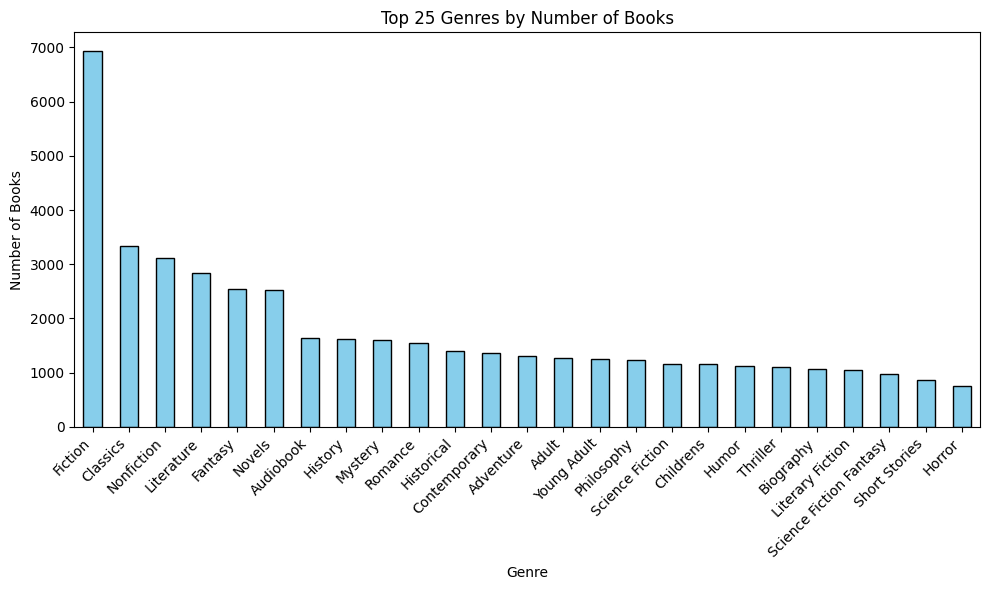

In [11]:
# Plot the top 25 genres
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 25 Genres by Number of Books')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Test 1: Does a higher number of ratings lead to a lower average rating?

We'll compare the number of ratings to the average rating for *each book*.


*   HO: Total number of ratings for individual books does not have an effect on average rating.
*   HA: Total number of ratings for individual books does have an effect on average rating.


In [12]:
# dataframe displaying info for just the top 25 genres
top_genres_list = top_genres.index.tolist()

df_top_genres = df[df['genres'].apply(lambda x: any(genre in top_genres_list for genre in x))]
df_top_genres

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21 00:00:00,Da Capo Press,"[Fiction, Writing,Essays, Literature,American,..."
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01 00:00:00,Penguin Books,"[Fiction, Science Fiction, Literature, Novels,..."
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01 00:00:00,Penguin Books,"[Historical,Historical Fiction, Fiction, Novel..."
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27 00:00:00,Ecco,"[Nonfiction, Sociology, Social Issues,Poverty,..."


In [13]:
# note: there are also fewer than 70 books with an average rating less than 3.00
df.sort_values('average_rating').head(70)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.00,0415940478,9780415940474,eng,386,0,0,2002-11-08 00:00:00,Routledge,[Literary Collections]
6561,24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.00,0684806371,9780684806372,eng,400,0,0,2001-05-01 00:00:00,Gale Cengage,[American literature]
9441,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.00,0805850848,9780805850840,eng,241,0,0,2006-08-05 00:00:00,Routledge,[Education]
6383,24010,"Laguna I Love You: The Best of ""Our Town",John Weld/Phil Interlandi,0.00,1564741575,9781564741578,eng,285,0,0,1996-03-01 00:00:00,Fithian Press,[History]
7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.00,0071485422,9780071485425,eng,248,0,0,2011-12-30 00:00:00,McGraw-Hill Professional Publishing,[Medical]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,159,Dinner with Anna Karenina,Gloria Goldreich,2.99,0778322270,9780778322276,eng,360,411,65,2006-01-28 00:00:00,Mira Books,"[Fiction, Writing,Books About Books, Contempor..."
5283,19084,Aristotle's Ethics (SparkNotes Literature Guides),SparkNotes,3.00,158663822X,9781586638221,eng,80,2,0,2003-06-13 00:00:00,SparkNotes,[Philosophy]
8371,32189,Sukhoi Su-27 Flanker (WarbirdTech #42),Yefim Gordon/Peter Davison,3.00,1580070914,9781580070911,eng,104,6,0,2006-04-01 00:00:00,Specialty Press,[History]
10213,41378,Flirting With Danger,Kate Walker,3.00,037311818X,9780373118182,eng,188,12,4,1996-06-01 00:00:00,Harlequin,"[Harlequin,Harlequin Presents, Romance]"


In [14]:
# note: there are no average ratings 'x' where 0.00 < x < 2.00
df.sort_values('average_rating').head(30)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.00,0415940478,9780415940474,eng,386,0,0,2002-11-08 00:00:00,Routledge,[Literary Collections]
6561,24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.00,0684806371,9780684806372,eng,400,0,0,2001-05-01 00:00:00,Gale Cengage,[American literature]
9441,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.00,0805850848,9780805850840,eng,241,0,0,2006-08-05 00:00:00,Routledge,[Education]
6383,24010,"Laguna I Love You: The Best of ""Our Town",John Weld/Phil Interlandi,0.00,1564741575,9781564741578,eng,285,0,0,1996-03-01 00:00:00,Fithian Press,[History]
7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.00,0071485422,9780071485425,eng,248,0,0,2011-12-30 00:00:00,McGraw-Hill Professional Publishing,[Medical]
6880,25903,I'll Be Home Before Midnight and I Won't Get P...,Anthony E. Wolf,0.00,0394755669,9780394755663,eng,288,0,0,1988-05-12 00:00:00,Knopf Doubleday Publishing Group,[Social Science]
10501,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,0.00,0313309337,9780313309335,eng,176,0,0,2002-03-30 00:00:00,Greenwood Press,[Literary Criticism]
7147,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,0.00,3598715439,9783598715433,grc,335,0,0,1998-07-15 00:00:00,K.G. Saur Verlag,[History]
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.00,0916724948,9780916724948,eng,63,0,0,1997-12-31 00:00:00,Arts Publications,[Art]
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.00,1932206086,9781932206081,eng,304,0,0,2003-01-01 00:00:00,Frederick P. Lenz Foundation for American Budd...,[Spiritual life]


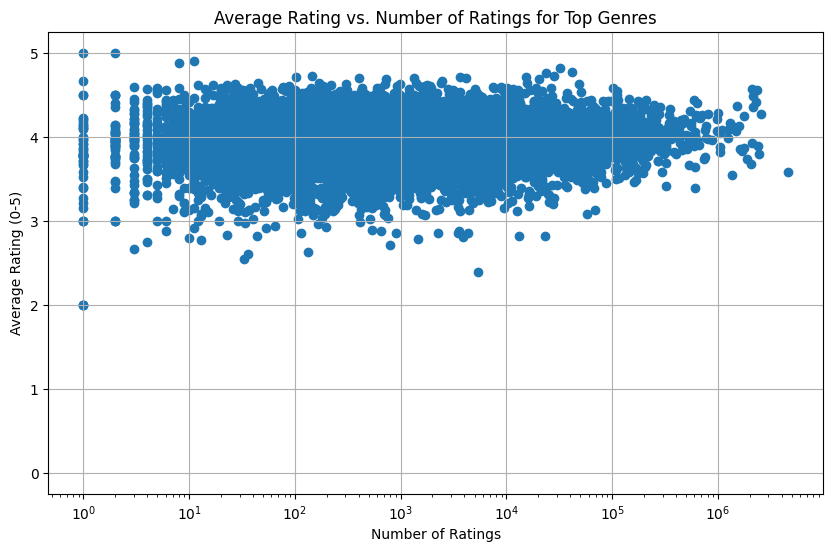

In [15]:
# scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_top_genres['ratings_count'], df_top_genres['average_rating'])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating (0-5)")
plt.title("Average Rating vs. Number of Ratings for Top Genres")
plt.xscale('log')

plt.grid(True)
plt.show()

In [16]:
# apply Pearson's correlation test on the dataframe with top genres
from scipy import stats
r, pval = stats.pearsonr(df_top_genres['ratings_count'], df_top_genres['average_rating'])
print(f"r = {r:.4f}, p = {pval:.2e}")

r = 0.0426, p = 1.28e-05


The p-value of approximately 1.192 x 10^-5 is much smaller than the significance level of 0.05. Therefore, we can reject the null hypothesis, which had stated that the total number of ratings didn't have a significant effect on the average ratings for books. The number of ratings a book has does effect the average rating for the book.

This makes sense because the more people that read a book, who have differing opinions and world experiences, will provide more diverse ratings.

##Test 2: Does the book author and genre have a relationship?

We'll check for a relationsip between the top 10 authors and what we defined as the top genres.
- HO: The author of the book does not have an effect on the book genre.
- HA: The author of the book does have an effect on the book genre.<br><br>
For this purpose we will use a Chi-square test.

In [17]:
from scipy.stats import chi2_contingency

# Top 10 authors in published books
topAuthors = df["Author"].value_counts().head(10).index
filteredData = df[df["Author"].isin(topAuthors)].copy()

# Expects the earlier genre in the list to have a higher precedence
def getTopGenre(lst):
    for genre in lst:
        if genre in top_genres:
            return genre
    return None


filteredData["Primary_Genre"] = filteredData["genres"].apply(lambda lst: getTopGenre(lst))

contingencyTable = pd.crosstab(filteredData["Author"], filteredData["Primary_Genre"])
chi2Stat, pValue, dof, expected = chi2_contingency(contingencyTable)

print(f"Chi-squared Statistic: {chi2Stat}")
print(f"P-value: {pValue}")
print(f"Degrees of Freedom: {dof}")

Chi-squared Statistic: 1205.712674055884
P-value: 6.8274498139835365e-211
Degrees of Freedom: 63


The p-value is below the significance level of 0.05 so we reject the null hypothesis. The alternative hypothesis, the author of the book does have an effect on the book genre, holds true.<br><br>
As we will see in the heatmap plot, the top ten authors we analyzed usually prefer to stick to one specific genre that they are comfortable with. There are some authors such as Stephen King and P.G. Wodehouse whose book genres are particularly homogenous. Overall, the conclusions made from this test appear to make sense as many well-known authors, expect for a few exceptions, stick to one genre.

### We can also see which authors play the largest role in rejecting the null hypothesis.
Chi-square heatmap reference: https://acastat.net/statbook/chisqresid.htm

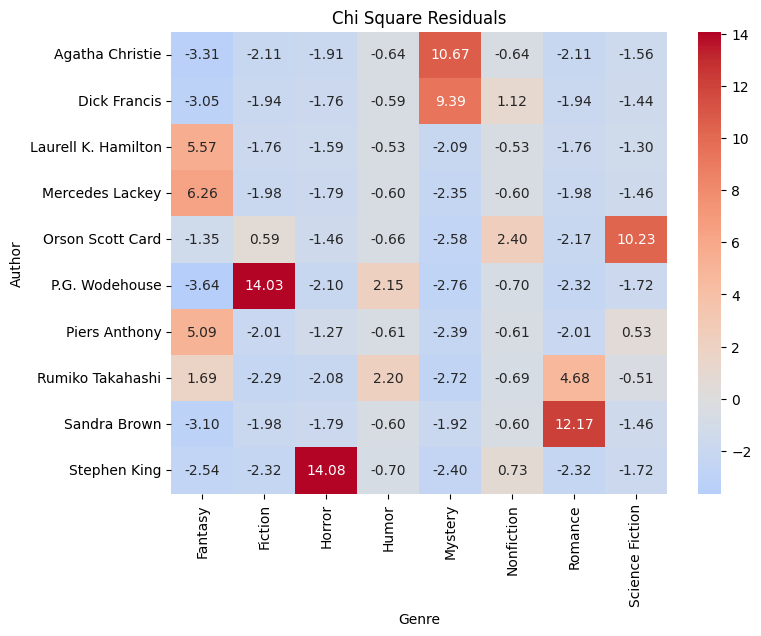

In [18]:
import seaborn as sns
import numpy as np

residuals = (contingencyTable - expected) / np.sqrt(expected)

plt.figure(figsize=(8, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f")

plt.xlabel("Genre")
plt.ylabel("Author")
plt.title("Chi Square Residuals")

plt.show()

Any cell with an absolute value greater than 2 is considered a major influence on the chi-square test statistic.

## Test 3: Does page count vary significantly between fiction and non-fiction books?

- H0: The distribution of page number for fiction and non-fiction books are not significantly different.
- HA: The distribution of page number for fiction and non-fiction books are significantly different.

For this purpose we will use Mann-Whitney U-test.

First, let's take a look at the distribution of page count overall.

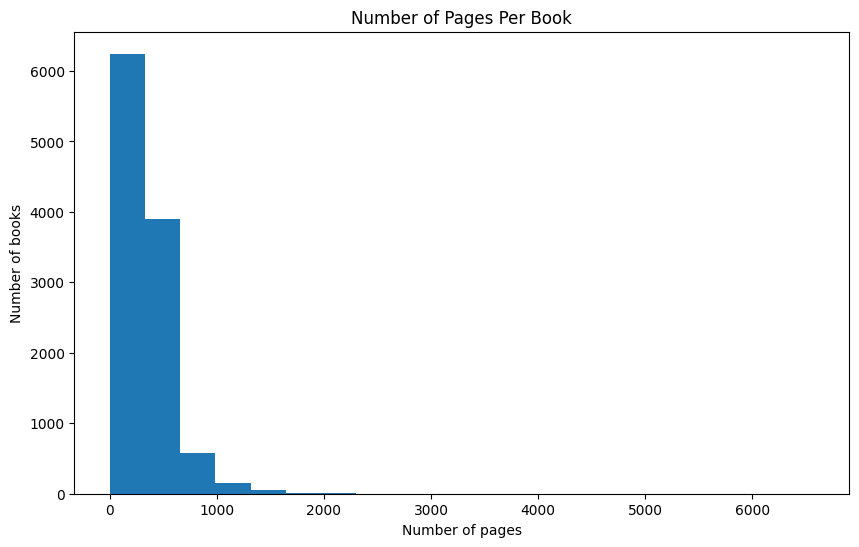

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df["num_pages"], bins=20) # plotting page numbers in histogram
plt.xlabel("Number of pages")
plt.ylabel("Number of books")
plt.title("Number of Pages Per Book")
plt.show()

It seems there's some outliers with page counts in the thousands. Let's take a look at them.

In [20]:
display(df[df["num_pages"] >= 2000])

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,"[Fantasy, Young Adult, Fiction, Fantasy,Magic,..."
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,2005-09-12 00:00:00,Scholastic,"[Fantasy, Fiction, Young Adult, Fantasy,Magic,..."
1053,3579,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,0553609416,76783609419,eng,2088,98611,1447,1998-10-06 00:00:00,Starfire,"[Classics, Fiction, Young Adult, Childrens, Hi..."
5616,20749,Study Bible: NIV,Anonymous,4.70,0310929555,9780310929550,eng,2198,4166,186,2002-10-01 00:00:00,Zondervan Publishing House,"[Christian, Religion, Nonfiction, Religion,Chr..."
6260,23589,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,4.64,0618391134,9780618391134,eng,2264,45,0,2006-11-02 00:00:00,Houghton Mifflin Harcourt,"[Nonfiction, Reference, Biography]"
6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,2004-10-17 00:00:00,W. W. Norton Company,"[Historical,Historical Fiction, Fiction, Histo..."
6805,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,1986-05-09 00:00:00,Mariner Books,"[History, Nonfiction, War, War,World War II, B..."
6825,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1981-01-01 00:00:00,Christian Classics,"[Philosophy, Religion,Theology, Religion, Clas..."
7865,30258,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,4.35,0071391401,9780071391405,eng,2751,23,4,2004-07-27 00:00:00,McGraw-Hill Medical Publishing,"[Health,Medicine, Medical, Reference, Science,..."
9933,40012,Goodman & Gilman's the Pharmacological Basis o...,Laurence L. Brunton/John S. Lazo/Keith L. Parker,4.29,0071422803,9780071422802,eng,2021,185,8,2005-09-21 00:00:00,McGraw-Hill Professional Publishing,"[Textbooks, Health,Medicine, Science,Biology, ..."


It looks like a lot of these are collections of multiple books, and there's very few of them compared to the size of our dataset, so it should be fine to remove them. Let's do that and see what our distribution looks like now.

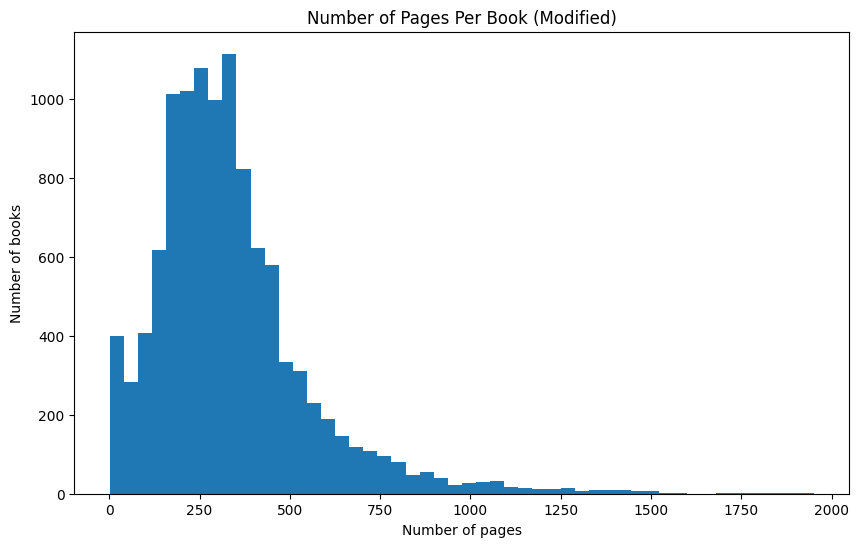

In [21]:
filtered_df = df[df["num_pages"] < 2000]
plt.figure(figsize=(10, 6))
plt.hist(filtered_df["num_pages"], bins=50)
plt.xlabel("Number of pages")
plt.ylabel("Number of books")
plt.title("Number of Pages Per Book (Modified)")
plt.show()

Now we can see that there is a strange spike of books with an extremely small number of pages (between 0 and 40). Closer investigation reveals that many of these data points are probably incorrect, as they list less than 10 pages. Let's remove all books with page counts less than 40.

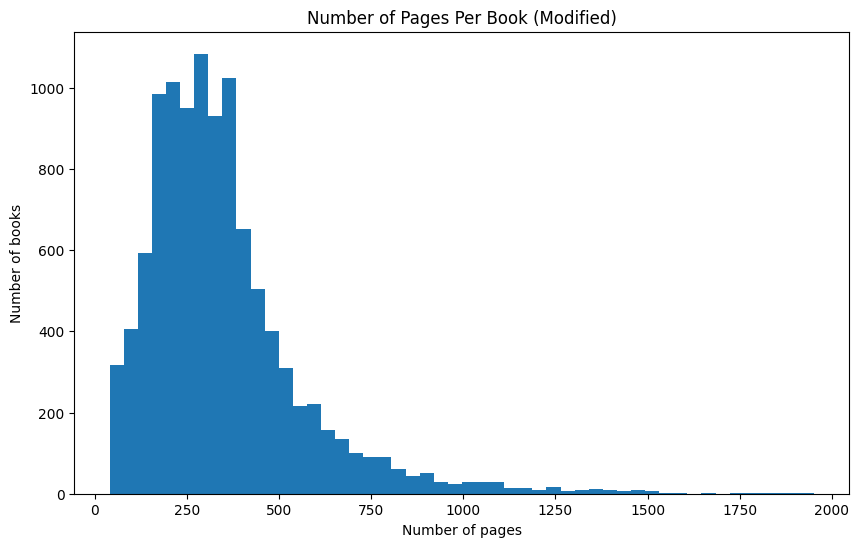

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
5611,20687,Lilly's Big Day,Kevin Henkes,4.20,0060742364,9780060742362,en-US,40,3177,205,2006-03-28 00:00:00,Greenwillow Books,"[Childrens,Picture Books, Childrens, Fantasy, ..."
2241,8013,Mr. Christmas,Roger Hargreaves/Adam Hargreaves,3.65,0843121106,9780843121100,eng,40,202,17,2006-09-14 00:00:00,Price Stern Sloan,"[Holiday,Christmas, Childrens,Picture Books, C..."
2294,8233,Summertime in the Big Woods,Laura Ingalls Wilder/Renée Graef,4.18,0064434974,9780064434973,eng,40,867,31,2000-02-02 00:00:00,HarperCollins,"[Childrens,Picture Books, Childrens, Historica..."
572,1853,Wild About Books,Judy Sierra/Marc Brown,4.17,037582538X,9780375825385,eng,40,4541,378,2004-08-10 00:00:00,Alfred A. Knopf Books for Young Readers,"[Childrens,Picture Books, Animals, Childrens, ..."
6700,25112,Common Ground: The Water Earth and Air We Share,Molly Bang,3.74,0590100564,9780590100564,eng,40,98,29,1997-10-01 00:00:00,Blue Sky Press,"[Childrens,Picture Books, Nonfiction, Science,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1417,The Complete Pelican Shakespeare,William Shakespeare/Stephen Orgel/A.R. Braunmu...,4.50,0141000589,9780141000589,eng,1808,578,25,2002-11-07 00:00:00,Viking,"[Classics, Poetry, Fiction, Plays, Drama, Lite..."
2566,9462,Plato: Complete Works,Plato/John M. Cooper/Benjamin Jowett/Dorothea ...,4.35,0872203492,9780872203495,eng,1838,9284,133,1997-05-01 00:00:00,Hackett Publishing Company Inc.,"[Philosophy, Classics, Nonfiction, History, Po..."
4834,17341,The Collected Letters of C.S. Lewis Volume 3:...,C.S. Lewis/Walter Hooper,4.47,0060819227,9780060819224,eng,1840,144,16,2007-01-09 00:00:00,HarperOne,"[Biography, Nonfiction, Christian, History, Re..."
1056,3582,The New Annotated Sherlock Holmes: The Complet...,Arthur Conan Doyle/Leslie S. Klinger,4.64,0393059162,9780393059168,eng,1878,1411,54,2004-11-30 00:00:00,W. W. Norton & Company,"[Mystery, Classics, Fiction, Short Stories, My..."


In [22]:
filtered_df = filtered_df[filtered_df["num_pages"] >= 40]
plt.figure(figsize=(10, 6))
plt.hist(filtered_df["num_pages"], bins=50)
plt.xlabel("Number of pages")
plt.ylabel("Number of books")
plt.title("Number of Pages Per Book (Modified)")
plt.show()
display(filtered_df.sort_values(by=["num_pages"]))

Okay, this seems more reasonable now. Next, let's conduct a hypothesis test to determine if the page counts are significantly different between fiction and non-fiction books.

We already know from our histogram that the distribution of page number is likely not normal. So rather than a t-test, we'll be better off using the Mann-Whitney U Test. For good measure, let's plot the page distributions of both fiction and nonfiction books as well.


The significance level will be 0.05.

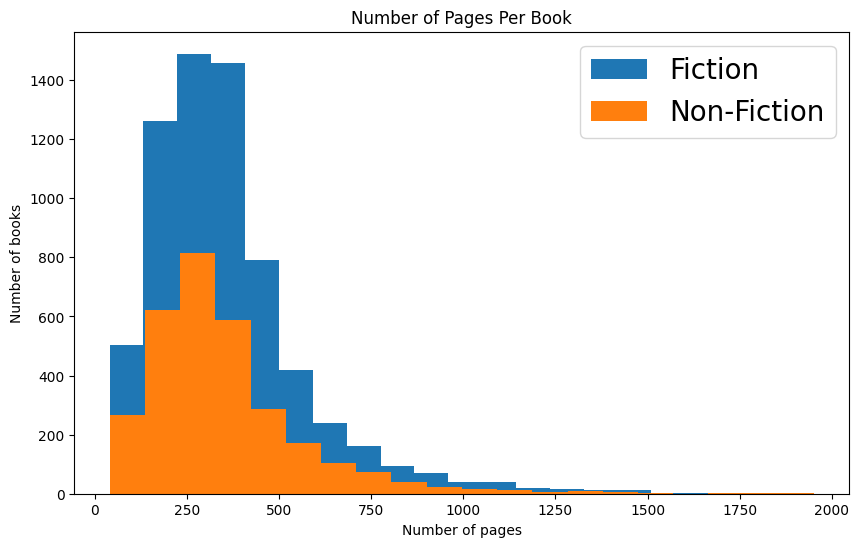

np.float64(0.05134064072450464)

In [23]:
# separate data into two groups: fiction and nonfiction
mask = filtered_df.genres.apply(lambda x: "Fiction" in x)
fiction = filtered_df[mask]
mask2 = filtered_df.genres.apply(lambda x: "Nonfiction" in x)
nonfiction = filtered_df[mask2]

plt.figure(figsize=(10, 6))
plt.hist(fiction["num_pages"],bins=20, label="Fiction")
plt.hist(nonfiction["num_pages"],bins=20, label="Non-Fiction")
plt.xlabel("Number of pages")
plt.ylabel("Number of books")
plt.title("Number of Pages Per Book")
plt.legend(fontsize=20)
plt.show()

# conduct mann-whitney u test
result = scipy.stats.mannwhitneyu(fiction["num_pages"], nonfiction["num_pages"])
display(result.pvalue)

Our p-value is 0.0513, which means we fail to reject the null hypothesis. We conclude that the page number distributions of fiction and non-fiction books are not significantly different.

<center><h2>Primary Analysis</h2></center>

From our exploratory analysis, we see that there are some interesting relationships between author and genre, and between number of ratings and average rating. The question we decided we were especially interested in is "What determines the average rating of a book?" Since we are interested in using continuous features to predict a continuous value, the method that makes the most sense to use here is linear regression.

First, we need to split our data into features and labels. Our target variable is average_rating, and the features that seem most relevant are num_pages, ratings_count, text_reviews_count, and genres. Also, since genres is a categorical variable that can have multiple categories at once, we want to encode it so that we can feed it into our model.

There are over 200 genres, as we found in our data exploration, so to avoid the curse of dimensionality we instead choose just the top 25 genres to encode. We can make a feature for each of these genres, and give simple true/false values (encoded as 1/0) for each genre for each book. If the book contains genres that aren't in the top 25, we ignore them.

In [24]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

X = df[["num_pages","ratings_count","text_reviews_count","genres"]]
y = df["average_rating"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# encoding
genre_list = list(top_genres.index)

# make a custom function, since our categories overlap
def genre_encoder(X):
  for genre in genre_list[:-1]:
    new_col = []

    # for each genre, figure out for all books if they have that genre
    for book in X["genres"]:
      if genre in book:
        new_col.append(1)
      else:
        new_col.append(0)

    # make a new column for that genre
    X[genre] = new_col

  X = X.drop(columns=["genres"])
  return X

X_train = genre_encoder(X_train)
X_test = genre_encoder(X_test)
X_train

,num_pages,ratings_count,text_reviews_count,Fiction,Classics,Nonfiction,Literature,Fantasy,Novels,Audiobook,...,Young Adult,Philosophy,Science Fiction,Childrens,Humor,Thriller,Biography,Literary Fiction,Science Fiction Fantasy,Short Stories
282,259,51,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,815,3628,254,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2366,278,26,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10614,384,26040,614,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
966,176,26,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,55,24985,1751,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1254,212,7205,825,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9025,342,1389,47,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
739,25,67,17,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


Even though we limited this to the top 25 genres, we still have a lot of variables. In order to help performance, we perform PCA to reduce the dimensionality of our features. Let's keep 10 features.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Now, we're ready to fit the model. We'll use a LinearRegression model from the sklearn module.<br><br>
<center><h2>Visualization</h2></center>
We'll now visualize our predicted vs actual average ratings using Linear Regression.

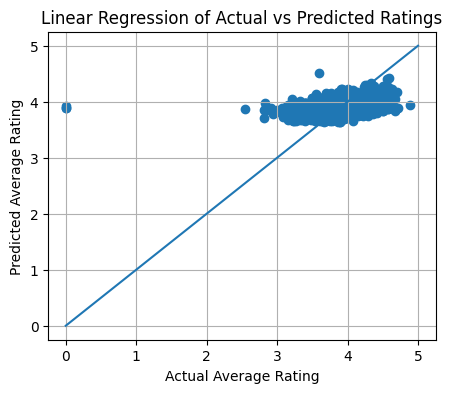

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Linear Regression of Actual vs Predicted Ratings")
plt.grid(True)

plt.show()

We can see that our linear model's predictions are not a strong fit for the data. A large proportion of the average ratings fall between 3 and 5 stars, while ratings below 2 stars are very rare. This skewed distribution is likely contributing to the model's inability to accurately capture the full range of ratings. To confirm the model's performance, let's calculate the mean squared error and r2 values, which will help us quantify the model's fit.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

MSE: 0.0934, R2: 0.1034


The MSE of 0.0940 suggests that the predicted average ratings deviate from the actual average ratings by 0.094. The R-squared value of 0.0999 indicates a low predictive performance. Given these metrics, let's take a look at the data's distribution.

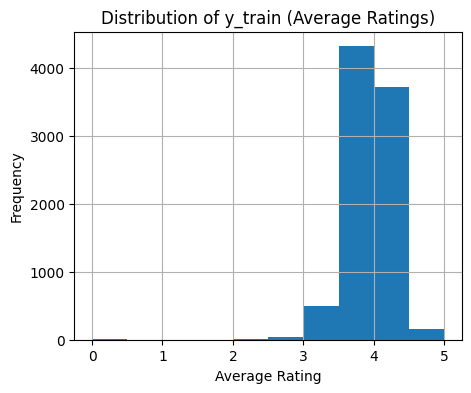

In [28]:
plt.figure(figsize=(5, 4))
plt.hist(y_train)
plt.title("Distribution of y_train (Average Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

This histogram shows a heavily skewed distribution of average ratings in the training set, with over 8000 ratings falling between 3 and 5 stars, while there are less than 200 ratings below 3 stars.

<h2>Improved Prediction</h2>

We can reduce some of the noise by adding more information that our model can predict with. In this case, we will add information about the author to each book. Next, we will apply log-transformations to numerical data, then we will use Random Forest to train and evaluate.<br><br>
First, we will add some basic features and split our data.

In [29]:
from sklearn.ensemble import RandomForestRegressor

# We actually want the NaN columns, removing them could create bias, so we will start with a fresh csv.
df = pd.read_csv('Goodreads_books_with_genres.csv')

# Convert publishing date to datetime and get the year
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year

# Filter to authors with more than 6 books
author_counts = df['Author'].value_counts()
valid_authors = author_counts[author_counts > 6].index
books = df[df['Author'].isin(valid_authors)].copy()

# Split
train_df, test_df = train_test_split(books, test_size=0.2, random_state=42)

author_stats = (
    train_df
    .groupby('Author')
    .agg(
        author_book_count=('Book Id', 'count'),
        author_total_ratings=('ratings_count', 'sum'),
        author_total_reviews=('text_reviews_count', 'sum'),
        author_avg_pages=('num_pages', 'mean')
    )
    .reset_index()
)

# Add the book author's statistics to each book for train and test
train = train_df.merge(author_stats, on='Author', how='left')
test = test_df.merge(author_stats, on='Author', how='left')

Next, we perform log-transformations on the numerical data.

In [30]:
numeric_cols = [
    'author_book_count',
    'author_total_ratings',
    'author_total_reviews',
    'author_avg_pages',
    'num_pages',
    'text_reviews_count',
    'ratings_count',
    'publication_year'
]

# Log-transformation
def log_transform(df, cols):
    for c in cols:
        df[f'log_{c}'] = np.log1p(df[c])
    return df

train = log_transform(train, numeric_cols)
test = log_transform(test, numeric_cols)

Next, we hot-encode the genres.

In [31]:
all_genres = train['genres'].dropna().str.split(';').explode()
top_genres = all_genres.value_counts().head(10).index.tolist()

for genre in top_genres:
    train[f'genre_{genre}'] = train['genres'].apply(lambda x: int(genre in x) if pd.notnull(x) else 0)
    test[f'genre_{genre}'] = test['genres'].apply(lambda x: int(genre in x) if pd.notnull(x) else 0)

genre_cols = [f'genre_{g}' for g in top_genres]
feature_cols_with_genres = [f'log_{c}' for c in numeric_cols] + genre_cols

X_train = train[feature_cols_with_genres]
X_test = test[feature_cols_with_genres]
y_train = train['average_rating']
y_test = test['average_rating']

Finally, we fit and perform the predictions.

MSE: 0.0269
R² score: 0.6275


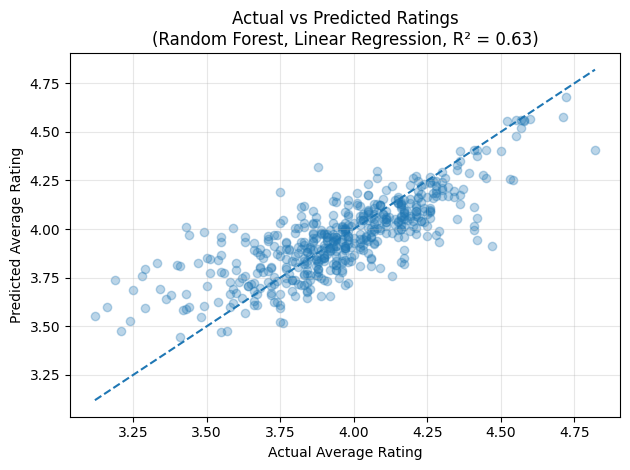

In [32]:
# Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R² score: {r2:.4f}')

plt.grid(alpha=0.3)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Average Rating')
plt.ylabel('Predicted Average Rating')
plt.title(f'Actual vs Predicted Ratings\n(Random Forest, Linear Regression, R² = {r2:.2f})')
plt.tight_layout()
plt.show()

The R² score is now 0.6275 which shows an improvement. However, there is not enough information in the dataset to explain more than 63% of the variation. This is partly attributed to how the average rating is skewed towards higher values.

<center><h2>What Has The Strongest Correlation?</h2></center>


There also tends to be a strong linear correlation between the number of ratings (0 to 5) and the number of text reviews. We can vizualize this through linear regression and see just how strong the relation is.

MSE: 0.5762
R² score: 0.9103


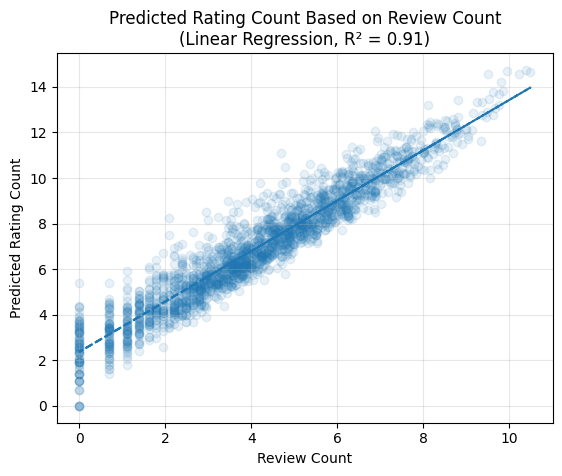

In [33]:
from sklearn.linear_model import LinearRegression

df = df[(df['ratings_count'] > 0) & (df['text_reviews_count'] > 0)].copy()

# Log-transformation
df['log_ratings'] = np.log(df['ratings_count'])
df['log_reviews'] = np.log(df['text_reviews_count'])

X = df[['log_reviews']]
y = df['log_ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R² score: {r2:.4f}')
plt.grid(alpha=0.3)
plt.scatter(X_test, y_test, alpha=0.1)
plt.plot(X_test, y_pred, linestyle='--')
plt.xlabel('Review Count')
plt.ylabel('Predicted Rating Count')
plt.title(f'Predicted Rating Count Based on Review Count\n(Linear Regression, R² = {r2:.2f})')
plt.show()

The R² score of 0.91 shows that the 91% of the variation in the dependent variable is explained by the independent variable.

<center><h2>Does Author Specialization in Genre Influence KMeans?</h2></center>

From previous tests, we know that the top ten authors specialize in specific genres. Now we would like to visualize this with KMeans Clustering.

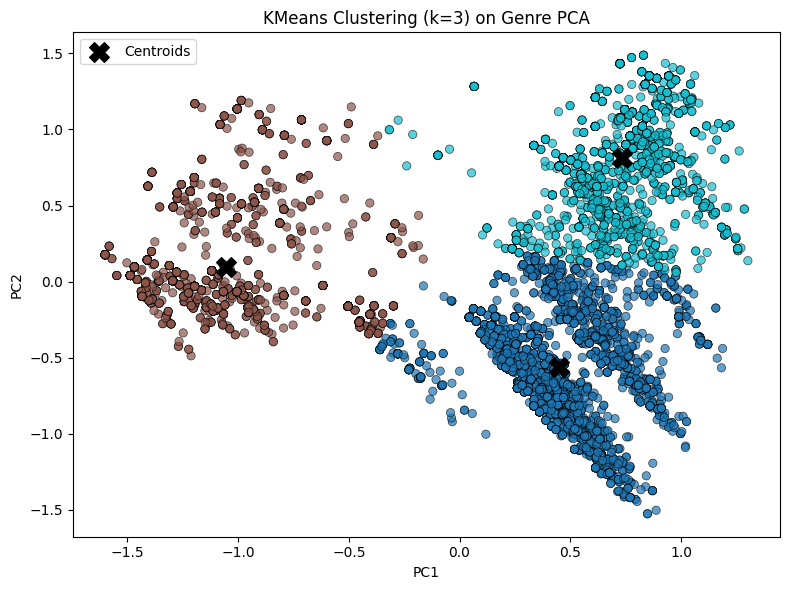


Top-10 Authors × Cluster counts:
Cluster            0  1   2
Author                     
Stephen King      38  2   0
P.G. Wodehouse     2  0  36
Orson Scott Card  32  2   0
Agatha Christie   32  1   0
Rumiko Takahashi  30  1   0
Mercedes Lackey   29  0   0
Piers Anthony     29  0   0
Sandra Brown      27  1   0
Dick Francis      26  1   0
James Patterson   23  0   0


In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Drop all the rows without a genre
df = df.dropna(how='any')

# Turn the genres column from a string into an array
df.loc[:, 'genres'] = df['genres'].apply(lambda input: input.split(';'))

top_genres = main_genres.value_counts().head(25)
df["genres"] = df["genres"].apply(
    lambda lst: [g for g in lst if g in top_genres.index]
)

# Hot encode genres
mlb = MultiLabelBinarizer(classes=list(top_genres.index))
genre_feats = mlb.fit_transform(df["genres"])

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(genre_feats)

# Elbow method
# inertias = []
# K_RANGE = range(1, 10)
# for k in K_RANGE:
#     km_temp = KMeans(n_clusters=k, random_state=42)
#     km_temp.fit(X_pca)
#     inertias.append(km_temp.inertia_)

# plt.figure(figsize=(6, 4))
# plt.plot(list(K_RANGE), inertias, 'o-', markersize=6)
# plt.xlabel("Number of clusters k")
# plt.ylabel("Inertia")
# plt.title("Elbow Method for Optimal k")
# plt.show()

loadings = pd.DataFrame(
    pca.components_.T,
    index=list(top_genres.index),
    columns=["PC1", "PC2"]
)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

df_clusters = df.copy()
df_clusters["Cluster"] = labels

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels, cmap='tab10',
    alpha=0.7, edgecolor='k', linewidth=0.5
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X', s=200, c='black', label='Centroids'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (k=3) on Genre PCA')
plt.legend()
plt.tight_layout()
plt.show()

top10_authors = df["Author"].value_counts().head(10).index
author_cluster_ct = pd.crosstab(
    df_clusters["Author"],
    df_clusters["Cluster"]
)
top10_ct = author_cluster_ct.loc[top10_authors]
top10_ct["Total"] = top10_ct.sum(axis=1)
top10_ct = top10_ct.sort_values("Total", ascending=False).drop(columns="Total")

print("\nTop-10 Authors × Cluster counts:")
print(top10_ct)

The crosstable shows that the top ten authors are heavily biased towards their respective clusters.

<center><h2>Visualization</h2></center>


<center><h2>Insights and Conclusions</h2></center>

bla bla bla